In [1]:
df=pd.read_excel("E:\HTL Project\Dataset 4.xlsx")
df.head()

<IPython.core.display.Javascript object>

,Moisture,Volatile,Ash,Temp,Time,Pressure,HHV,ERR,Yield%
0,11.8,67.0,8.6,300,30,130,35.2,37.2,36.0
1,3.9,67.4,24.4,350,60,180,37.9,42.7,43.0
2,5.8,67.3,9.5,250,60,100,33.8,33.0,33.0
3,8.5,61.6,18.5,250,30,100,34.8,41.5,24.7
4,4.9,54.4,13.5,375,50,221,36.0,64.8,55.3


In [2]:
df['Moisture']=df['Moisture'].fillna(df['Moisture'].mode()[0])
df['Volatile']=df['Volatile'].fillna(df['Volatile'].mode()[0])
df['ERR']=df['ERR'].fillna(df['ERR'].mode()[0])

In [8]:
x=df.drop('Yield%',axis=1)
y=df['Yield%']
from sklearn.feature_selection import SelectFromModel
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
from sklearn import preprocessing
from sklearn import utils
lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(y_train)
print(encoded)
print(utils.multiclass.type_of_target(y_train))
print(utils.multiclass.type_of_target(y_train.astype('int')))
print(utils.multiclass.type_of_target(encoded))
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(x_train,encoded)
y_pred =clf.predict(x_test)
y_pred
from sklearn.metrics import r2_score
print("Mean absolute Error: " ,np.mean(np.absolute(y_pred-y_test)))
print("Root mean square error: " ,np.mean(y_pred-y_test)**2)
print("R2 square: " ,r2_score(y_pred,y_test))
clf1 = tree.DecisionTreeClassifier()
clf1.fit(x_train,encoded)
y_pred1 =clf1.predict(x_train)
y_pred1
from sklearn.metrics import r2_score
print("Mean absolute Error: " ,np.mean(np.absolute(y_pred1-y_train)))
print("Root mean square error: " ,np.mean(y_pred1-y_train)**2)
print("R2 square: " ,r2_score(y_pred1,y_train))

<IPython.core.display.Javascript object>

[23 23  8 18 11 28 27 40 55 58  7 24 29 56 30 29 41 57 34 17 45  9 53 21
  4 44 54 31  4 22 13 12 39 47  7 51  1 32 11 26  1 38 31 34 10 10 42 25
 19 35  6 36 18  3 20 47 33 32  2 52 10 50  0  5 43 53 56 12 18 39 14 15
 36 49 37 46 45 16  8 48]
continuous
multiclass
multiclass


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Mean absolute Error:  10.489999999999998


<IPython.core.display.Javascript object>

Root mean square error:  17.139600000000005
R2 square:  0.6086312235571659


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Mean absolute Error:  6.2174999999999985


<IPython.core.display.Javascript object>

Root mean square error:  10.676556250000006
R2 square:  0.8120535295250652


In [9]:
params = {
    'max_depth': [5,10,20,50,100]
}

In [10]:
from sklearn.model_selection import GridSearchCV
rf_grid = GridSearchCV(estimator=clf,
                           param_grid=params,
                           cv = 3,
                           n_jobs=4, verbose=2)

In [11]:
rf_grid.fit(x_train,encoded)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=4,
             param_grid={'max_depth': [5, 10, 20, 50, 100]}, verbose=2)

In [12]:
rf_grid.best_params_

{'max_depth': 10}

In [13]:
data=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
data.head()

<IPython.core.display.Javascript object>

,Actual,Predicted
63,11.6,0
65,29.2,22
22,39.6,36
93,32.6,36
83,18.0,7


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

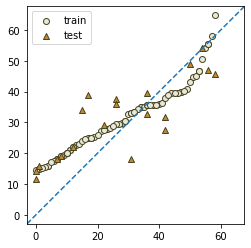

In [15]:
fig, ax = plt.subplots()
ax.scatter(y_pred1,y_train,label='train',color='#e8e7d8',edgecolors='#494623')
ax.scatter(y_pred,y_test,label='test',color='#c3892b',marker ="^",edgecolors='#494623')
#ax.xlabel('Actual Values of HHV',fontsize=14)
#ax.ylabel('Predicted Values of HHV',fontsize=14)
ax.legend()
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
ax.plot(lims, lims, '--')
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)
fig.savefig('/Users/Rishi Chaitanya/Desktop/DT yield 4.png', dpi=300)